# EDB simple example

This example shows how to use the ``EDBCommon`` class to
open an existing EDB project.

## Perform required imports

Perform the required imports.

In [1]:
import os
import shutil

In [2]:
from ansys.aedt.core import generate_unique_folder_name

In [3]:
from ansys.aedt.toolkits.common.utils import download_file
from ansys.aedt.toolkits.common.backend.api import EDBCommon

## Initialize temporary folder and project settings

Initialize a temporary folder to copy the input file into
and specify project settings.

In [4]:
URL_BASE = "https://raw.githubusercontent.com/ansys/example-data/master/toolkits/common/"
EDB_PROJECT = "edb_edge_ports.aedb/edb.def"
URL = os.path.join(URL_BASE, EDB_PROJECT)

temp_folder = os.path.join(generate_unique_folder_name())

edb_path = os.path.join(temp_folder, "edb_example.aedb")
os.makedirs(edb_path, exist_ok=True)
local_project = os.path.join(edb_path, "edb.def")

download_file(URL, local_project)

'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyaedt_prj_70L\\edb_example.aedb\\edb.def'

## Initialize toolkit

Initialize the toolkit.

In [5]:
toolkit = EDBCommon()

## Initialize EDB project

Open the EDB project.

In [6]:
load_edb_msg = toolkit.load_edb(edb_path)

C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyedb\dotnet\database\Variables.py:301: SyntaxWarning: invalid escape sequence '\d'
  loc = re.search("[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?", variable_value)
C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyedb\dotnet\database\components.py:1260: SyntaxWarning: invalid escape sequence '\m'
  >>> edb_file = r'C:\my_edb_file.aedb'


C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyedb\dotnet\database\edb_data\simulation_configuration.py:2037: SyntaxWarning: invalid escape sequence '\m'
  >>> sim_setup.output_aedb = r"C:\temp\my_edb.aedb"
C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyedb\dotnet\database\edb_data\simulation_configuration.py:2704: SyntaxWarning: invalid escape sequence '\T'
  >>> config.export_json(r"C:\Temp\test_json\test.json")
C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyedb\dotnet\database\edb_data\simulation_configuration.py:2732: SyntaxWarning: invalid escape sequence '\T'
  >>> test.import_json(r"C:\Temp\test_json\test.json")


## Get toolkit properties

Get toolkit properties, which contain the project information.

In [7]:
new_properties = toolkit.get_properties()
edb_project = new_properties["active_project"]

## Save project

Copy the current project in a new file.

In [8]:
directory, old_file_name = os.path.split(edb_project)
new_path = os.path.join(directory, "new_edb.aedb")
toolkit.save_edb(new_path)

INFO - Project C:\Users\ansys\AppData\Local\Temp\pyaedt_prj_70L\new_edb.aedb saved


True

## Get cell names

Get cell names using PyEDB.

INFO - Play with EDB


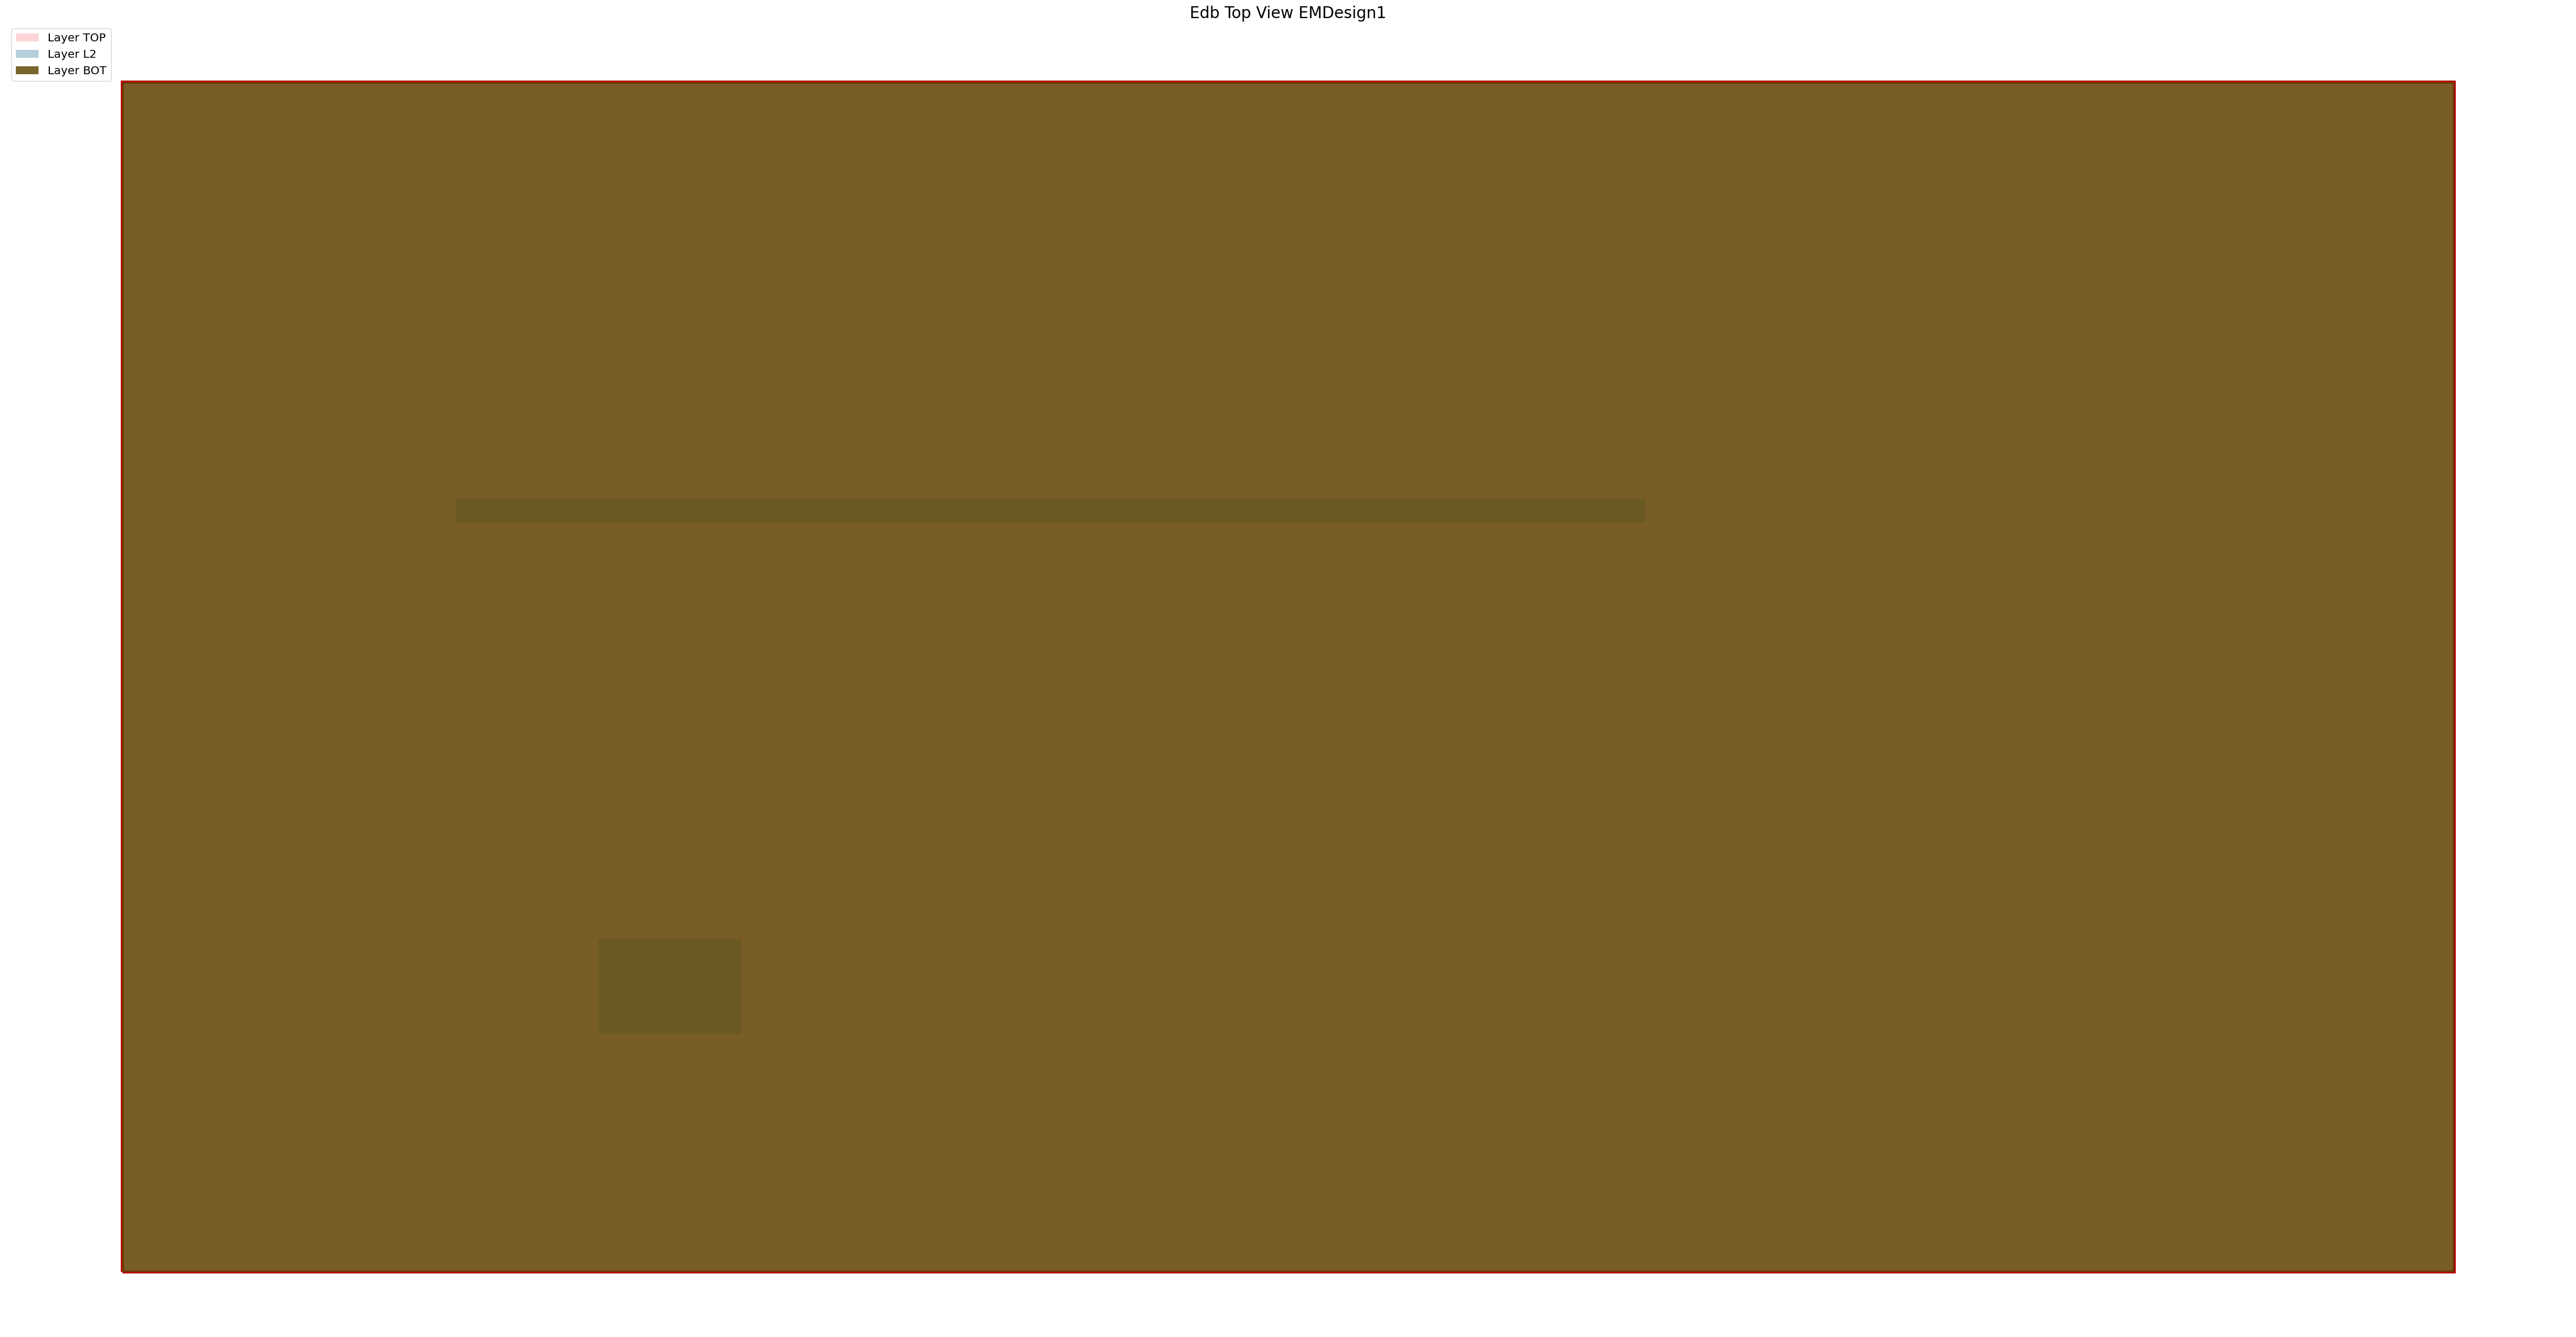

(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View EMDesign1'}>)

In [9]:
toolkit.logger.info("Play with EDB")
cell_names = toolkit.edb.cell_names
toolkit.edb.nets.plot()

## Save and release EDB

Save and release EDB.

In [10]:
toolkit.close_edb()

INFO - EDB is closed.


True

## Remove temporary folder

Remove the temporary folder.

In [11]:
shutil.rmtree(temp_folder, ignore_errors=True)